In [1]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Data pre-processing

In [17]:
# load the data and drop Nan includes values

data = pd.read_csv("coffee-prices-historical-chart-data.csv")
data.dropna(inplace=True)

In [24]:
# A short glance at the data 

data.head()

,date,value,time,lag_1
0,1973-08-20,0.6735,0,NaN
1,1973-08-21,0.6710,1,0.6735
2,1973-08-22,0.6580,2,0.6710
3,1973-08-23,0.6675,3,0.6580
4,1973-08-24,0.6660,4,0.6675


In [25]:
# Add a new column name "time" for using Time-Step featuring

data['time'] = np.arange(len(data['date']))
data.head()

,date,value,time,lag_1
0,1973-08-20,0.6735,0,NaN
1,1973-08-21,0.6710,1,0.6735
2,1973-08-22,0.6580,2,0.6710
3,1973-08-23,0.6675,3,0.6580
4,1973-08-24,0.6660,4,0.6675


In [26]:
# Add a new column name lag_1 for using Lag Featuring

data["lag_1"] = data["value"].shift(1)
data.head()

,date,value,time,lag_1
0,1973-08-20,0.6735,0,NaN
1,1973-08-21,0.6710,1,0.6735
2,1973-08-22,0.6580,2,0.6710
3,1973-08-23,0.6675,3,0.6580
4,1973-08-24,0.6660,4,0.6675


In [27]:
# set Independent Variable (feature) and Dependent Variable for both Featuring approaches


X_time_f = data.loc[:, 'time'].values
Y_time_f = data.loc[:, "value"].values
Y_lag_f = data.loc[:, "value"]
X_lag_f = data.loc[:, "lag_1"]
X_lag_f.dropna(inplace=True)
Y_lag_f, X_lag_f = Y_lag_f.align(X_lag_f, join="inner")

In [28]:
# # fill missing values

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(Y)
# Y = imputer.transform(Y)

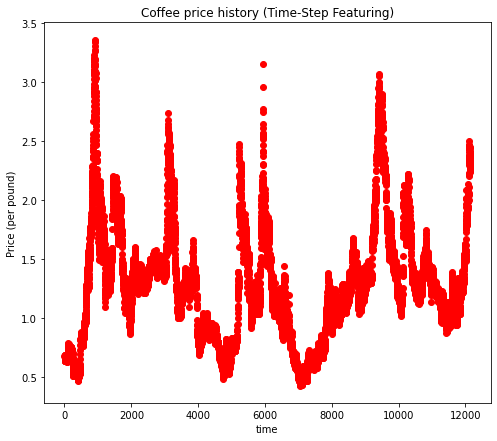

In [29]:
# A glance at the data for Time-Step Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_time_f, Y_time_f, color='red')
plt.title('Coffee price history (Time-Step Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

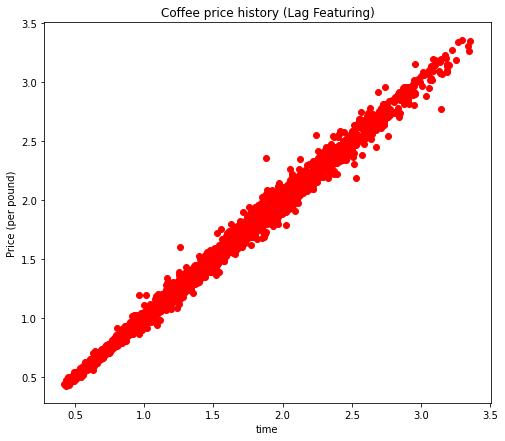

In [30]:
# A glance at the data for Lag Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_lag_f, Y_lag_f, color='red')
plt.title('Coffee price history (Lag Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [180]:
# split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

## Simple Linear Regression

In [181]:
# train the Linear Regrssion model

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [182]:
# make prediction with Linear Regrssion

y_pred = lr_reg.predict(X_test)

In [183]:
# Linear Regression Coeficient and intercept values

print("Coef: {}".format(lr_reg.coef_))
print("Intercept:  {}".format(lr_reg.intercept_))

Coef: [[2.47705848e-06]]
Intercept:  [-0.53427439]


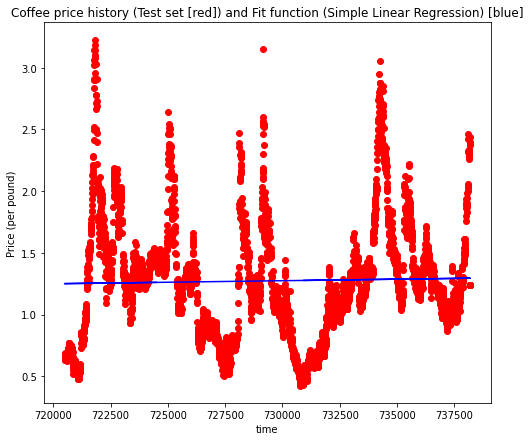

In [184]:
# A glance at the data and fit line

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lr_reg.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Simple Linear Regression) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [185]:
# R2 core for Simple Linear Regression

slr_r2 = r2_score(y_test, y_pred)
print("R2_score for Simple Linear Regression:  {}".format(slr_r2))

R2_score for Simple Linear Regression:  0.0003317114344260075


## Polynomial Linear Regression

In [186]:
# create Polynimial feature 

poly_feature = PolynomialFeatures(degree=4)
X_poly = poly_feature.fit_transform(X)

In [187]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=1/3, random_state=0)

In [188]:
# fit the model

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

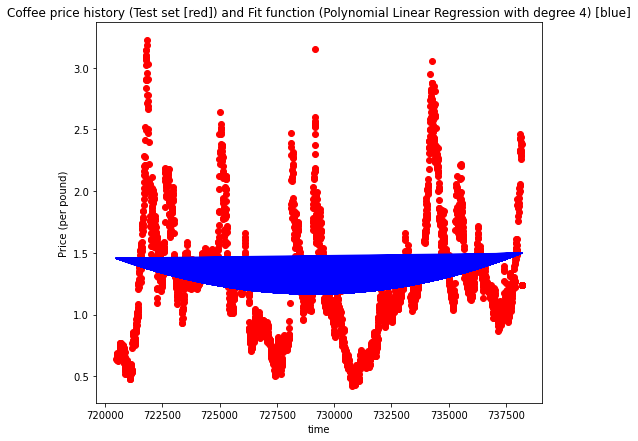

In [189]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test[:, 1], y_test, color="red")
plt.plot(X_train[:, 1], poly_model.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Polynomial Linear Regression with degree 4) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [190]:
# R2 core for Polynomial Linear Regression

y_pred = poly_model.predict(X_test)
plr_r2 = r2_score(y_test, y_pred)
print("R2_score for Polynomial Linear Regression:  {}".format(plr_r2))

R2_score for Polynomial Linear Regression:  0.03759745234500955


## Support Vector Regressor 

In [191]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [192]:
# Feature scaling. The reason is values (prices) are small compare to ordinal times.

sc_x_train = StandardScaler()
sc_y_train = StandardScaler()
X_train = sc_x_train.fit_transform(X_train)
y_train = sc_y_train.fit_transform(y_train)

In [193]:
# Support Vectore Regrssion Model

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

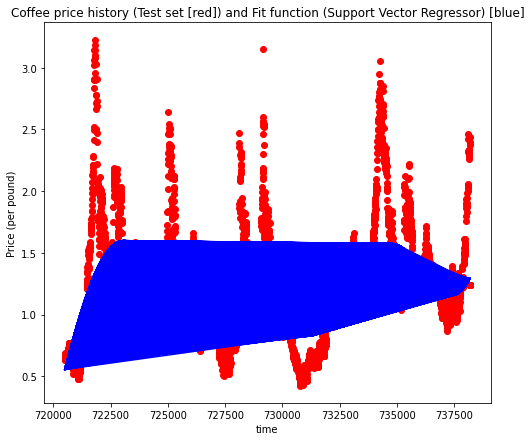

In [194]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color="red")
plt.plot(sc_x_train.inverse_transform(X_train), sc_y_train.inverse_transform(svr_regressor.predict(X_train).reshape(-1, 1)), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Support Vector Regressor) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [195]:
# R2 core for Support Vector Regressor

sc_x_test = StandardScaler()
X_test = sc_x_test.fit_transform(X_test)
sc_y_test = StandardScaler()
y_test = sc_y_test.fit_transform(y_test)
y_pred = svr_regressor.predict(X_test).reshape(-1, 1)
svr_r2 = r2_score(sc_y_test.inverse_transform(y_test), sc_y_test.inverse_transform(y_pred))
print("R2_score for Support Vector Regression:  {}".format(svr_r2))

R2_score for Support Vector Regression:  0.3638723180106719


## Decision Tree

In [196]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [197]:
# build the model

dtree_regressor = DecisionTreeRegressor(random_state=0)
dtree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

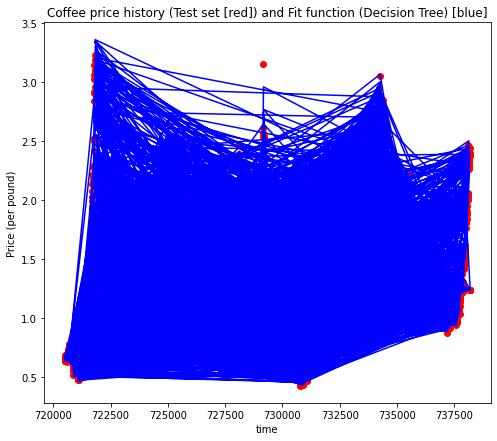

In [198]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, dtree_regressor.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Decision Tree) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [199]:
# R2 score

y_pred = dtree_regressor.predict(X_test)
dtree_reg_r2 = r2_score(y_test, y_pred)
print("R2_score for Decision Tree Regression:  {}".format(dtree_reg_r2))

R2_score for Decision Tree Regression:  0.9941192138891557


## Random Forest

In [200]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [201]:
# build the model

rf_regressor = RandomForestRegressor(n_estimators=3, random_state=0)
rf_regressor.fit(X_train, y_train)

/tmp/ipykernel_56101/1426269959.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=3, random_state=0)

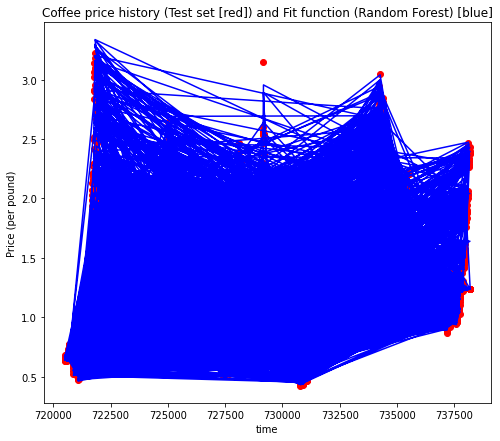

In [202]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, rf_regressor.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Random Forest) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [203]:
# R2 score

y_pred = rf_regressor.predict(X_test)
rf_reg_r2 = r2_score(y_test, y_pred)
print("R2_score for Random Forest Regression:  {}".format(dtree_reg_r2))

R2_score for Random Forest Regression:  0.9941192138891557


## Model R2 Scores

In [204]:
print("Simple Linear Regression:  {}".format(slr_r2))
print("Polynomial Linear Regression:  {}".format(plr_r2))
print("Support Vector Regression:  {}".format(svr_r2))
print("Decision Tree Regression:  {}".format(dtree_reg_r2))
print("Random Forest Regression:  {}".format(rf_reg_r2))

Simple Linear Regression:  0.0003317114344260075
Polynomial Linear Regression:  0.03759745234500955
Support Vector Regression:  0.3638723180106719
Decision Tree Regression:  0.9941192138891557
Random Forest Regression:  0.9951710246265504


## Coffee Price Prediction

**Random Forest** model is used for prediction due to the higher R2 score

### 2023-01-01

In [205]:
f1_date = dt.strptime("2023-01-01", "%Y-%m-%d").date().toordinal()
f1_pred = rf_regressor.predict([[f1_date]])
print("Coffee price prediction for 2023-01-01:  {} ".format(f1_pred[0]))

Coffee price prediction for 2023-01-01:  1.237 


### 2023-06-01

In [208]:
f2_date = dt.strptime("2023-06-01", "%Y-%m-%d").date().toordinal()
f2_pred = rf_regressor.predict([[f2_date]])
print("Coffee price prediction for 2023-06-01:  {} ".format(f2_pred[0]))

Coffee price prediction for 2023-06-01:  1.237 
